In [2]:
import numpy as np 

#all_features = np.empty([0, num_features]) # np.array([])
#all_subjects = np.array([])
#all_pred     = np.array([])
#all_dx       = np.array([])

all_features = np.loadtxt('features_1.txt')
all_subjects = np.genfromtxt('subid_1.txt', dtype='str')
#all_dx = np.loadtxt('NewAnalysis_June2019/sex.txt')
all_pred = np.loadtxt('pred_1.txt')

num_features = all_features.shape[1]

In [7]:
all_features.shape

(8144, 8192)

In [235]:
import pandas as pd
from functools import reduce

#all_subjects = all_subjects[0:7282]
#all_dx = all_dx[0:7282]

demog = pd.read_csv('../abcd_ssphp01.csv')
all_demog = demog[demog.subjectkey.isin(all_subjects) & demog.eventname.isin(['baseline_year_1_arm_1'])]

demog2 = pd.read_csv('../pdem02.csv', encoding = "ISO-8859-1")
all_demog2 = demog2[demog2.subjectkey.isin(all_subjects)]

cogsco = pd.read_csv('../abcd_ps01.csv')
all_cogsco = cogsco[cogsco.subjectkey.isin(all_subjects)]

nihtbx = pd.read_csv('../abcd_tbss01.csv')
all_nihtbx = nihtbx[nihtbx.subjectkey.isin(all_subjects)]

nihtbx = pd.read_csv('../cct01.csv')
all_cashc = nihtbx[nihtbx.subjectkey.isin(all_subjects)]

nihtbx = pd.read_csv('../lmtp201.csv')
all_lmt = nihtbx[nihtbx.subjectkey.isin(all_subjects)]

#preds = pd.DataFrame({'subjectkey': all_subjects, 'pred': all_pred, 'dx': all_dx, 'features': np.empty(all_dx.shape[0])}, columns=['subjectkey', 'pred', 'dx', 'features'])
preds = pd.DataFrame({'subjectkey': all_subjects, 'pred': all_pred, 'features': np.empty(all_pred.shape[0])}, columns=['subjectkey', 'pred', 'features'])
fdf = pd.concat([pd.DataFrame(all_features), pd.DataFrame({'subjectkey': all_subjects}, columns=['subjectkey'])], axis=1)


dfs = [all_demog, all_demog2, all_cogsco, all_nihtbx, all_cashc, all_lmt, preds, fdf]
all_info3 = reduce(lambda left,right: pd.merge(left,right,on='subjectkey'), dfs)

C:\Users\E31195\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,5,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\E31195\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,128,129,130,131) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=intera

In [240]:
(all_info3.sex_x)

0       M
1       M
2       F
3       M
4       M
5       M
6       M
7       M
8       M
9       M
10      M
11      M
12      M
13      F
14      M
15      F
16      M
17      F
18      M
19      M
20      F
21      M
22      F
23      F
24      F
25      M
26      F
27      M
28      F
29      M
       ..
3824    F
3825    M
3826    M
3827    F
3828    F
3829    M
3830    M
3831    F
3832    F
3833    M
3834    F
3835    M
3836    M
3837    F
3838    M
3839    F
3840    M
3841    M
3842    F
3843    F
3844    F
3845    F
3846    F
3847    F
3848    F
3849    F
3850    M
3851    F
3852    M
3853    M
Name: sex_x, Length: 3854, dtype: object

In [242]:
from scipy.stats.stats import pearsonr

num_features = 8192
pds = np.nan_to_num(pd.to_numeric(all_info3.pds_p_ss_male_category)) + np.nan_to_num(pd.to_numeric(all_info3.pds_p_ss_female_category))
age = np.nan_to_num(pd.to_numeric(all_info3.interview_age_x))
ses = np.nan_to_num(pd.to_numeric(all_info3.demo_prtnr_ed_v2))

sexxx = all_info3.sex_x;
sex = np.empty([sexxx.shape[0]])
for i in range(sex.shape[0]):
    if sexxx[i] == 'M':
        sex[i]= 0
    elif sexxx[i] == 'F':
        sex[i]= 1
    else:
        print ('Sex unknown!')

pvals_features_pds = np.empty([num_features])
pvals_features_age = np.empty([num_features])
pvals_features_ses = np.empty([num_features])
pvals_features_sex = np.empty([num_features])

# for i in range(num_features):
#     pds_r, pvals_features_pds[i] = pearsonr(pds, all_info3.iloc[:,i+174])
#     age_r, pvals_features_age[i] = pearsonr(age, all_info3.iloc[:,i+174])
#     ses_r, pvals_features_ses[i] = pearsonr(ses, all_info3.iloc[:,i+174])
#     sex_r, pvals_features_sex[i] = pearsonr(sex, all_info3.iloc[:,i+174])

In [13]:
np.savetxt('pds_feat.txt', pvals_features_pds < 0.005, fmt='%d')
np.savetxt('age_feat.txt', pvals_features_age < 0.005, fmt='%d')
np.savetxt('ses_feat.txt', pvals_features_ses < 0.005, fmt='%d')

np.savetxt('all_sex.txt', sex, fmt='%d')

In [14]:
sum(pvals_features_pds < 0.005)

1149

In [15]:
sum(pvals_features_sex < 0.005)

1670

In [16]:
sum(pvals_features_age < 0.005)

550

In [17]:
sum(pvals_features_ses < 0.005)

74

In [5]:
volums_scores = pd.read_csv('../all_vol_scores.csv')
all_vol = volums_scores[volums_scores.subjectkey.isin(all_subjects)]

NameError: name 'pd' is not defined

In [67]:
dfs2 = [all_info3, all_vol]
all_info4 = reduce(lambda left,right: pd.merge(left,right,on='subjectkey'), dfs2)

In [96]:
sexxx = all_info3.sex_x;
sex = np.empty([all_info3.shape[0]])
for i in range(sex.shape[0]):
    if sexxx[i] == 'M':
        sex[i]= 0
    elif sexxx[i] == 'F':
        sex[i]= 1
    else:
        print ('Sex unknown!')

In [95]:
all_info4.shape

(3856, 8666)

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib as mpl 

import matplotlib.pyplot as plt 
from scipy import stats

In [158]:
from scipy import stats
import dcor

#region_name = 'pallidum'
#region_name = 'amygdala'
#region_name = 'cerebelum'
region_name = 'putamen'

scatter_plot = False

i = 0
females = np.zeros(sum(sex==1))
males = np.zeros(sum(sex==0))
fv = np.zeros([2, sum(sex==1)])
mv = np.zeros([2, sum(sex==0)])

for s in all_info4.columns[8366:]:
    if region_name.lower() in s.lower():
        print (s)
        f = all_info4[s][sex==1]
        m = all_info4[s][sex==0]
        [ss, p] = stats.ttest_ind(f, m)
        print ('f = %.2f +/- %.2f\nm = %.2f +/- %.2f\np = %.10f' % (np.mean(f), np.std(f), np.mean(m), np.std(m), p))
        
        fv[:][i] = f
        mv[:][i] = m

        females = females + f
        males = males + m
        
        i+=1
        
females = females / 2
males = males / 2

[ss, p] = stats.ttest_ind(females, males)
print ('f = %.2f +/- %.2f\nm = %.2f +/- %.2f\np = %.10f' % (np.mean(females), np.std(females), np.mean(males), np.std(males), p))


pea_ravlt_sd_trial_iv_tc


C:\Users\E31195\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


TypeError: can only concatenate str (not "float") to str

In [154]:
s

8014

In [ ]:
#[ss, p] = dcor.distance_correlation(fv, mv)

#         std = np.sqrt((females.var(ddof=1) + males.var(ddof=1)) / 2)
#         t = (females.mean() - males.mean() / (std * np.sqrt(2/(all_info3.shape[0]/2))))
#         df = all_info3.shape[0] - 2
#         pval = 1 - stats.t.cdf(t,df=df)
#         if (scatter_plot):
#             fig1 = plt.figure(i+1, figsize=(9, 6))
#             #fig1, ax = plt.subplots()
#             plt.plot(np.ones(sum(sex==1))+np.random.rand(sum(sex==1))-0.4, all_info4[s][sex==1] , '.', c='firebrick', label='Female')
#             plt.plot(np.zeros(sum(sex==0))+np.random.rand(sum(sex==0))-0.6, all_info4[s][sex==0], '.', c='steelblue', label='Male')
#             plt.xticks(np.arange(0), ())
#             plt.yticks(np.arange(0), ())
#             plt.title(s)
#             plt.legend(loc='best', shadow=True);
#             fig1.show()
#             #fig.savefig('tsne_features_2d.eps', format='eps', dpi=300)
#             #fig.savefig('tsne_features_2d.jpg', format='jpg', dpi=300)
#         else:
#             ## combine these different collections into a list    
#             data_to_plot = [females, males]
#             fig2 = plt.figure(i+1, figsize=(9, 6))
#             #ax2 = fig2.add_subplot(211+i)
#             bp = plt.boxplot(data_to_plot, notch=True)
#             plt.xticks([1, 2], ['Female', 'Male'])
#             plt.title(s + (' (pval = %f)' % pval))
#             #fig.savefig('fig1.png', bbox_inches='tight')
#        i+=1
        

In [152]:
all_info4['sri24_parc116_amygdala_l_gm'][100]

1126.66

In [169]:
np.random.rand(sum(sex==1))

array([0.22564856, 0.58541287, 0.59424361, ..., 0.11555681, 0.07159877,
       0.94751611])

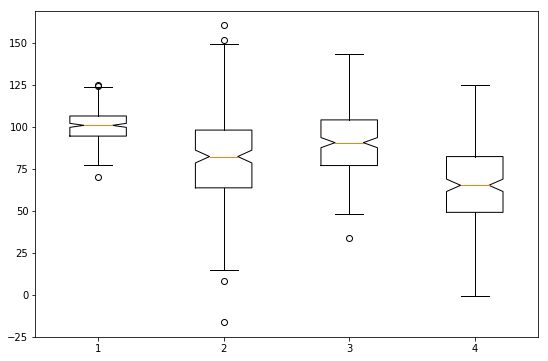

In [176]:
import numpy as np 
import matplotlib as mpl 

import matplotlib.pyplot as plt 

## Create data
np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 250)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)

## combine these different collections into a list    
data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, notch=True)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

In [72]:
all_info4['pea_ravlt_sd_trial_iv_tc']

0        12
1        15
2        13
3         8
4        11
5         9
6        11
7        14
8        13
9        10
10       12
11        8
12        9
13       12
14       12
15       12
16       15
17       12
18       15
19        9
20       12
21       10
22       14
23        9
24       13
25       14
26       12
27       10
28       14
29       13
       ... 
3826     14
3827     10
3828     10
3829      9
3830     13
3831     10
3832     14
3833      8
3834     10
3835     11
3836     10
3837     11
3838     10
3839     12
3840     10
3841    NaN
3842      8
3843     11
3844      9
3845      6
3846     12
3847     11
3848     11
3849     13
3850     11
3851     15
3852     10
3853     10
3854     12
3855      9
Name: pea_ravlt_sd_trial_iv_tc, Length: 3856, dtype: object

In [4]:
namee = 'hippocampus'
for s in all_info4.columns[:]:
    if isinstance(s, str) and namee.lower() in s.lower():
        print (s)

NameError: name 'all_info4' is not defined

In [159]:
from scipy import stats

[s, p] = stats.ttest_ind(pds[sex==0], pds[sex==1])
print ('%2.20f' % p)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 8144 but corresponding boolean dimension is 3856

In [249]:
a

array([2., 2., 1., ..., 1., 2., 1.])

In [1]:
aaa = np.nan_to_num(pd.to_numeric(all_info3.pea_wiscv_trs))

a = aaa[sex==1]
print(np.mean(a), np.std(a))

b = aaa[sex==0]
print(np.mean(b), np.std(b))

print(np.sum(a==1)/(np.sum(a==1)+np.sum(a==2)))
print(np.sum(a==2)/(np.sum(a==1)+np.sum(a==2)))

print(np.sum(b==1)/(np.sum(b==1)+np.sum(b==2)))
print(np.sum(b==2)/(np.sum(b==1)+np.sum(b==2)))

[sss, p] = stats.ttest_ind(a, b)

print ('%2.20f' % p)

NameError: name 'np' is not defined

0.00014723421799035504


C:\Users\E31195\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


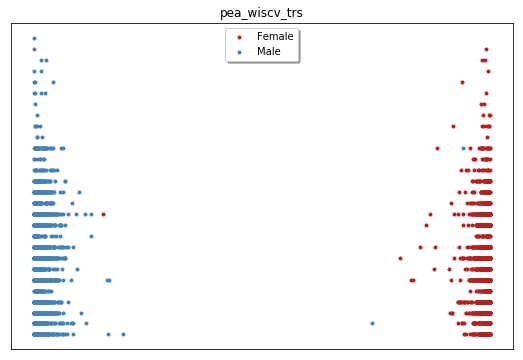

In [167]:

#s = 'pea_ravlt_sd_trial_iii_tc'
s = 'pea_wiscv_trs'

fvec = all_info4[s][sex==1]
mvec = all_info4[s][sex==0]
fpred = all_info4['pred'][sex==1]
mpred = all_info4['pred'][sex==0]

fnan = np.isnan(np.array(fvec.values, dtype=np.float64))
mnan = np.isnan(np.array(mvec.values, dtype=np.float64))

fvec = fvec[~fnan]
mvec = mvec[~mnan]
fpred = fpred[~fnan]
mpred = mpred[~mnan]

[sss, p] = stats.ttest_ind(np.array(fvec.values, dtype=np.float64), np.array(mvec.values, dtype=np.float64))

fvv = np.array(fvec.values, dtype=np.float64)
mvv = np.array(mvec.values, dtype=np.float64)

print ('%2.20f' % p)

fig1 = plt.figure(1, figsize=(9, 6))
#fig1, ax = plt.subplots()
# plt.plot(np.ones(fvec.shape[0])+np.random.rand(fvec.shape[0])-0.4, fvec, '.', c='firebrick', label='Female')
# plt.plot(np.zeros(mvec.shape[0])+np.random.rand(mvec.shape[0])-0.6, mvec, '.', c='steelblue', label='Male')
plt.plot(fpred, fvec, '.', c='firebrick', label='Female')
plt.plot(mpred, mvec, '.', c='steelblue', label='Male')
plt.xticks(np.arange(0), ())
plt.yticks(np.arange(0), ())
plt.title(s)
plt.legend(loc='best', shadow=True);
fig1.show()
#fig.savefig('tsne_features_2d.eps', format='eps', dpi=300)
    #fig.savefig('tsne_features_2d.jpg', format='jpg', dpi=300)
# else:
#     ## combine these different collections into a list    
#     data_to_plot = [females, males]
#     fig2 = plt.figure(i+1, figsize=(9, 6))
#     #ax2 = fig2.add_subplot(211+i)
#     bp = plt.boxplot(data_to_plot, notch=True)
#     plt.xticks([1, 2], ['Female', 'Male'])
#     plt.title(s + (' (pval = %f)' % pval))
#     #fig.savefig('fig1.png', bbox_inches='tight')
# i+=1
        

f = 10.00 +/- 2.57
m = 9.53 +/- 2.62
p = 0.0000000248


Text(0.5,1,'pea_ravlt_sd_trial_iii_tc (pval = 0.000000)')

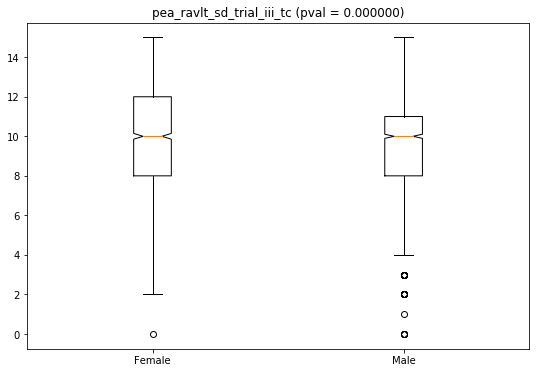

In [166]:
        
[ss, p] = stats.ttest_ind(fvv, mvv)
print ('f = %.2f +/- %.2f\nm = %.2f +/- %.2f\np = %.10f' % (np.mean(fvv), np.std(fvv), np.mean(mvv), np.std(mvv), p))

data_to_plot = [fvv, mvv]
fig2 = plt.figure(2, figsize=(9, 6))
bp = plt.boxplot(data_to_plot, notch=True)
plt.xticks([1, 2], ['Female', 'Male'])
plt.title(s + (' (pval = %f)' % p))


In [129]:
fvec = all_info4[''][sex==1]
mvec = all_info4[s][sex==0]
fpred = all_info4['pred'][sex==1]
mpred = all_info4['pred'][sex==0]

23

In [256]:
np.mean(all_info3.nihtbx_picvocab_uncorrected)

TypeError: Could not convert 878995849193821028588879380949383917488829083101867888827292949378869165808577988880867784908788877710476838181928684978981938685757810276881058883838797919388818976948088889076939688829590858587104818582668290918283997379818292847987848810792889197918891797975799686939287898976828787668986857986837580917877928486919679858982758981777888108959580999496847478869184838483698092977390788385799083949670768486901009076858976789289788779818110387938884856793878873738573908797829888878781839280908278879095948083948689668585937881791028382918888959488102928583988483751089588749599907792968883988291818786848790918110381808581691059681808191857690848781908084868599878682867593817687887582839595818884889890788875909290837887779180928899848277831099495857792897886908578929082929592838189718280738485768974917984888476868672838792877788938897958283849390908984969210278959691867779869094888388718286847510880748084929575847484748486749310579939189906779818994907589798596821028780839296788484809086848486877695957481898185858483867675818210990868285879276809282718610480929910495868780909080828792757380789882879286848583777776104851001008779103798979918180777884101788097747084778475908396808010788749496768385827776808598858575788577858691857776878988779182827683928482819089938076899985897687938284688791809087867580801019775818688969681839084788493918588869891848177898785821027979988087808079818289867910399818284978285751118483839386888586978996799194758092789710282867989100798691809386108808079808581988489949290969610969887499837793877788788175838986757481798581878787898189977974757579979086828569928784909190799078768396848384998387959984838684909789847774919582919488798893801069284889786948372849579946893104887884828682718683861148884828086817692818793808890839581105917676857295966980957490928381748085908794978894958392778194818483837871878085789277858080899080878970778579778392868183868582768091828094818892739381858477641048876838086789584828695949210290698184838472947576807490858986817778767010285888977917697838582698891958875828890978785698196788190105868083829610679781087986818968809581978883937491989380887989749388948186898787868878927783898277739890769511085809685919171958387101859685848492767183817983788282747872114103808487941108183778990718092858296789592848810392859686899082788985889688103818281928277838610082109909579848183848678887793839370898089906710088938183768280797989109857982728381819383817480948479751029490828096716888948688908293928479879184908410092788887949092878375788899778096999281711011028684809287809482898081839090891028684817685959190809686917997969975908095861018983968090709178808993938285789492958782968378987981778092687889928780889883828694899291988391918584926986797690808079899980779279809093898377818311588948190791067875957886847976757995937179898188988888838710280848281848293888491869686888597788180877683907981749483957984827999818595798872837680928369938876728385838689768292728288966994789087919387988481849791909986811018787987999898292768480868486849185768282809987668783818395877993787671797471688784938685938184869799947795837892100828578708182869993859484858382879293951049572928910178767884838795699786868591999490797673819710890909792927495887978948090788982908098818279113968691869287888495769072858710386781068297918377899810287908387928510585907989728982919783878589958987100102951028199908086939280728582801079893879268858610287829878757890859281908082928378838388958881838680968279658877798691698175748510110489919489748881877984849179738389878091868410389921039087828684948784859084788796828785828083839273751068896938986808076818595918893818687119788388758692868193917281918310383937582799282948878787384909390937678888583828488851008479809281937584879183918784779675869088828389838282939092848881958582878087899292819485909382868683839493848487887879908210280891038994888788961008774788083908392749682959183797195889892819087688686798582857586918978796979848788898582719884899784821028385927579828980879884838168927791818792838778829079948782861138790898886758185948683808583827980879087829110984104798187778087898285869790938677988483729288928680778679908388967983869684778087748595778390809487799579897981838983847791898088838178838283828181878785857187817481848682909787851019490776967968110385103699091838610087858888957685816877828173818485739194829188928585717992104888510576837984929088968672861031048298938681818481848687988791869180888485927575849595747796918185897473829292848267958490897682799093798875897989101968486889667748190808788818883818077819182811098786898293998184977790857985888788887781818487979091978781908089818590928779877579778287978084708387968083868588697385848885817487718285908979799879888390838287899275839290788681908369909292781048184100939892848570977882886877829087103761021039084908784788994103888790838890776778849178927785858381819980688688958589836878897980867876748186967981917982848381828473938287937486779875908484887678107859395886582968588857085878097988088881028210680858078888410036788487898879908993819081878990908284798710010191898894751028885967394938683879479907881879781987885948978787185948096807998808398937886898878867710173957780678985778180878482928289919278819381988888.28281968291948192779876718394868984979480949488959183868485779285847510597729010497878183808284878686828178818074101889177847510180798769831027992851028583769181807384858187987592848081837183858891788395759877858073918285759090868083878690817584968286848987738476848294908089788392827984767887858995789481887883879278929577828175858610084838376849296889786848288807277879790107831058593868967857996838886799782917087688582778971978065789279928588808775978897788086879678808476768583938888757373102110829380818389877685798284828686102668885838195917787848497859990977380101948681906391868290968887948589908884927768878175848684109909285827996968485789278928778898792938378825988788890107929682878393807290928785767899687772828184818479841089289918262938784809284868176837995106888882839190789288949081798089937993899083828081839978858384838192908888779170949288647990919695978499799085838795758098948399828296939786919492898479808583909083899484878281105879110098811027982898981828284738994878083879091738374818197821027881867880928381768390781007910179848488778367829177868085828485838878869177859379927485768292956991938698938591891089480828085828798818988788871978288969688919787811038975729399849661839481838590979188818484859210079827587927269929489898992898910778888386857881707883102967880929493908784818087848288718886777686927980917993868592887983889092879092898686838283868179879177878483818891878988681009191889580799788828076988894908996881137187739210582819583858788768878928085831138583987896758510188857691848996807810497978986907675829882778690977391788687897686808289858210380809079778974928292768479877996727480797870100103948681818690788180918877909083687083838079118918286103759084858392709987908681789283858381918395827376828883929072868086768481958673809279978692859393716686918687847886681058184778310687928681857084897783818360708680928394878686828696878295829377838396919180867782110798878959989868685847799978276809082868689638188998483918674758882898880668079778980821017686878980958580968381857190102949085878189898487907793829274839189748483808885101858188799285987886807490799089100957689102829491.5918593101104988181103967984837396878982928783101787683889294777986841028677928574969383848496948188839683779293928491103105757688889896798885887190748676807773969189877875937986788810183868279818888956983877085981029090927970818084848284859487837576818878848495759575817185868168769183869493817893847893837989928786928796918682798479788888908779868282829290858498818874999981687493868679868691988895729396758580768976828184828281938079102989483831039083858382848282789091728983959970788081828093100818184879087927783848295827991757381669198828881819792 to numeric